## EDA for the unemployment Rate in Kenya

In [1]:
import os
import re
import shutil
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import dtale 
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
import sweetviz as sv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations


### Define functions for repeated tasks


In [2]:
# Function to extract headers from a given file
def extract_headers(file_path):
    try:
        # Read the first sheet of the Excel file
        df = pd.read_excel(file_path)
        
        # Get the column headers
        headers = df.columns.tolist()
        
        return headers
    except Exception as e:
        return []
##########################################


def replace_characters(dataframe):
    # Iterate through the columns and update their names
    for col in dataframe.columns:
        # replace spaces, whitespaces, parenthesis with underscore and remove commas and % signs
        new_col_name = re.sub(r'[\s(),]+', '_', col).strip('_')
        new_col_name = re.sub(r'%', 'Percent', new_col_name)
        
        # Update the column name in the DataFrame
        dataframe.rename(columns={col: new_col_name}, inplace=True)

    # Return a list of the modified column names
    return dataframe.columns

##########################################
# replace dataframe datatype to numeric if it is actually numeric
def convert_to_float_or_pass(input_string):
    try:
        result = float(input_string)
        return result
    except ValueError:
        pass

# create barplots for all columns
# Create separate subplots for each column
def barplots(df):
    nrows=int(len(df.columns)/2)
    fig, axes = plt.subplots(nrows=nrows,ncols=len(df.columns)-nrows, figsize=(15, 5))
    for i, col in enumerate(df.columns):
        sns.barplot(x=df.index, y=col, data=df, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Value')

        plt.tight_layout()
    return plt.show()



            

## Read the data into dataframe(s) and rename the column names for easy readibility

In [3]:
population_projected=pd.read_excel("/Users/aman/Documents/omdena/Kenya/data/EDA/preprocessing_dataset.xlsx",skiprows=1,sheet_name=1)
unemployment_historical=pd.read_excel("/Users/aman/Documents/omdena/Kenya/data/EDA/Final_preprocessing_dataset.xlsx",skiprows=1)
unemployment_historical.columns=replace_characters(unemployment_historical)
unemployment_historical.shape
unemployment_historical.head()


,Year,Unemployment_Rate_Percent,Inflation_Rate,Labour_Force,Nominal_GDP_prices_Ksh_Million,Annual_GDP_growth_Percent,Real_GDP_prices_Ksh_Million,population_growth,Population_total,Urban_population_growth_annual_Percent,Adjusted_net_national_income_per_capita_annual_Percent_growth,Adjusted_savings:_education_expenditure_current_US$,Labor_force_participation_rate_for_ages_15-24_female_Percent_modeled_ILO_estimate,Labor_force_participation_rate_for_ages_15-24_male_Percent_modeled_ILO_estimate,Unemployment_female_Percent_of_female_labor_force_modeled_ILO_estimate,Unemployment_male_Percent_of_male_labor_force_modeled_ILO_estimate,Unemployment_total_Percent_of_total_labor_force_modeled_ILO_estimate
0,2000,0.0313,9.98,12114213,967838,0.0,982855,2.92,30851606,0.07,-2.81,645127096.87,50.46,46.89,3.37,2.89,3.13
1,2001,0.0307,5.73,12601491,1020022,3.8,1020111,3.03,31800343,1.95,-1.09,656047739.08,50.03,46.87,3.31,2.84,3.07
2,2002,0.0309,1.97,13103364,1035374,0.5,1025583,3.03,32779823,0.67,-2.34,755517161.8,49.61,46.84,3.33,2.86,3.09
3,2003,0.0304,9.81,13606235,1131783,2.9,1055658,2.97,33767122,0.49,-2.44,897571127.36,49.18,46.82,3.28,2.82,3.04
4,2004,0.0300,11.80,14125163,1274328,5.1,1109338,2.99,34791836,5.82,2.7,1011467728.44,48.76,46.79,3.23,2.77,3.00


## Check the data types


In [4]:
unemployment_historical['Year']=pd.to_datetime(unemployment_historical['Year'],format='%Y').dt.year
unemployment_historical.dtypes
unemployment_historical

,Year,Unemployment_Rate_Percent,Inflation_Rate,Labour_Force,Nominal_GDP_prices_Ksh_Million,Annual_GDP_growth_Percent,Real_GDP_prices_Ksh_Million,population_growth,Population_total,Urban_population_growth_annual_Percent,Adjusted_net_national_income_per_capita_annual_Percent_growth,Adjusted_savings:_education_expenditure_current_US$,Labor_force_participation_rate_for_ages_15-24_female_Percent_modeled_ILO_estimate,Labor_force_participation_rate_for_ages_15-24_male_Percent_modeled_ILO_estimate,Unemployment_female_Percent_of_female_labor_force_modeled_ILO_estimate,Unemployment_male_Percent_of_male_labor_force_modeled_ILO_estimate,Unemployment_total_Percent_of_total_labor_force_modeled_ILO_estimate
0,2000,0.0313,9.98,12114213,967838,0.0,982855,2.92,30851606,0.07,-2.81,645127096.87,50.46,46.89,3.37,2.89,3.13
1,2001,0.0307,5.73,12601491,1020022,3.8,1020111,3.03,31800343,1.95,-1.09,656047739.08,50.03,46.87,3.31,2.84,3.07
2,2002,0.0309,1.97,13103364,1035374,0.5,1025583,3.03,32779823,0.67,-2.34,755517161.8,49.61,46.84,3.33,2.86,3.09
3,2003,0.0304,9.81,13606235,1131783,2.9,1055658,2.97,33767122,0.49,-2.44,897571127.36,49.18,46.82,3.28,2.82,3.04
4,2004,0.0300,11.80,14125163,1274328,5.1,1109338,2.99,34791836,5.82,2.7,1011467728.44,48.76,46.79,3.23,2.77,3.00
5,2005,0.0297,9.91,14646884,1415823,5.7,1172784,2.98,35843010,8.3,5.13,1215687557.67,48.34,46.77,3.20,2.75,2.97
6,2006,0.0294,6.03,15171370,1622565,6.5,1249470,2.97,36925253,14.29,10.94,1710161374.1,47.91,46.75,3.17,2.73,2.94
7,2007,0.0292,4.27,15697007,1833511,6.9,1336849,2.97,38036793,4.85,1.79,1972468804.57,47.48,46.72,3.14,2.71,2.92
8,2008,0.0298,15.11,16235546,2107589,1.5,1357262,2.98,39186895,2.18,-0.82,2065737290.63,47.05,46.71,3.19,2.77,2.98
9,2009,0.0292,10.54,16792371,3275642,2.7,5361462,2.96,40364444,-4.45,-7.24,1967168900.61,46.62,46.69,3.13,2.72,2.92


## Convert the Year column into index and convert the series into time series

In [5]:
unemployment_historical.index=pd.to_datetime(unemployment_historical['Year'],format='%Y').dt.year
unemployment_historical=unemployment_historical.drop(['Year','Nominal_GDP_prices_Ksh_Million','Unemployment_Rate_Percent','Unemployment_male_Percent_of_male_labor_force_modeled_ILO_estimate','Unemployment_female_Percent_of_female_labor_force_modeled_ILO_estimate'],axis=1)
unemployment_historical.head()


,Inflation_Rate,Labour_Force,Annual_GDP_growth_Percent,Real_GDP_prices_Ksh_Million,population_growth,Population_total,Urban_population_growth_annual_Percent,Adjusted_net_national_income_per_capita_annual_Percent_growth,Adjusted_savings:_education_expenditure_current_US$,Labor_force_participation_rate_for_ages_15-24_female_Percent_modeled_ILO_estimate,Labor_force_participation_rate_for_ages_15-24_male_Percent_modeled_ILO_estimate,Unemployment_total_Percent_of_total_labor_force_modeled_ILO_estimate
Year,,,,,,,,,,,,
2000,9.98,12114213,0.0,982855,2.92,30851606,0.07,-2.81,645127096.87,50.46,46.89,3.13
2001,5.73,12601491,3.8,1020111,3.03,31800343,1.95,-1.09,656047739.08,50.03,46.87,3.07
2002,1.97,13103364,0.5,1025583,3.03,32779823,0.67,-2.34,755517161.8,49.61,46.84,3.09
2003,9.81,13606235,2.9,1055658,2.97,33767122,0.49,-2.44,897571127.36,49.18,46.82,3.04
2004,11.80,14125163,5.1,1109338,2.99,34791836,5.82,2.7,1011467728.44,48.76,46.79,3.00


## Replace data types to numeric values

In [6]:
# replace all column types to numeric if they are numeric indeed
for col in unemployment_historical.columns:
    if unemployment_historical[col].dtype == 'object':
        unemployment_historical[col] = unemployment_historical[col].apply(convert_to_float_or_pass)

In [7]:
# Create a dictionary to map old column names to new, simpler names for all columns
column_name_mapping = {
    'Inflation_Rate': 'Inflation',
    'Labour_Force': 'Labor',
    'Nominal_GDP_prices_Ksh_Million': 'Nominal_GDP_Ksh',
    'Annual_GDP_growth_Percent': 'GDP_Growth',
    'Real_GDP_prices_Ksh_Million': 'Real_GDP_Ksh',
    'population_growth': 'Population_Growth',
    'Population_total': 'Total_Population',
    'Urban_population_growth_annual_Percent': 'Urban_Population_Growth',
    'Adjusted_net_national_income_per_capita_annual_Percent_growth': 'Income_Per_Capita_Growth',
    'Adjusted_savings:_education_expenditure_current_US$': 'Education_Expenditure_usd',
    'Labor_force_participation_rate_for_ages_15-24_female_Percent_modeled_ILO_estimate': 'Female_Labor_Participation',
    'Labor_force_participation_rate_for_ages_15-24_male_Percent_modeled_ILO_estimate': 'Male_Labor_Participation',
    'Unemployment_female_Percent_of_female_labor_force_modeled_ILO_estimate': 'Female_Unemployment',
    'Unemployment_male_Percent_of_male_labor_force_modeled_ILO_estimate': 'Male_Unemployment',
    'Unemployment_total_Percent_of_total_labor_force_modeled_ILO_estimate': 'Total_Unemployment'
}

# Rename the columns in the DataFrame
unemployment_df = unemployment_historical.rename(columns=column_name_mapping)

In [8]:
unemployment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inflation,23.0,7.613043e+00,3.251344e+00,1.970000e+00,5.505000e+00,6.580000e+00,9.860000e+00,1.511000e+01
Labor,23.0,1.812661e+07,3.912670e+06,1.211421e+07,1.490913e+07,1.792648e+07,2.128856e+07,2.498516e+07
GDP_Growth,23.0,4.260870e+00,2.246156e+00,-3.000000e-01,3.350000e+00,4.800000e+00,5.350000e+00,8.100000e+00
Real_GDP_Ksh,23.0,5.013512e+06,3.346256e+06,9.828550e+05,1.211127e+06,6.090206e+06,7.739792e+06,9.851329e+06
Population_Growth,23.0,2.563478e+00,4.305030e-01,1.910000e+00,2.190000e+00,2.660000e+00,2.970000e+00,3.030000e+00
Total_Population,23.0,4.245514e+07,7.260731e+06,3.085161e+07,3.638413e+07,4.263514e+07,4.842140e+07,5.402749e+07
Urban_Population_Growth,21.0,4.714286e+00,5.057158e+00,-4.450000e+00,8.800000e-01,4.020000e+00,7.070000e+00,1.797000e+01
Income_Per_Capita_Growth,21.0,2.007143e+00,5.026712e+00,-7.240000e+00,-1.290000e+00,1.540000e+00,4.690000e+00,1.540000e+01
Education_Expenditure_usd,21.0,2.385473e+09,1.349314e+09,6.451271e+08,1.215688e+09,2.065737e+09,3.077921e+09,4.837662e+09
Female_Labor_Participation,23.0,4.576043e+01,2.896549e+00,4.154000e+01,4.336500e+01,4.577000e+01,4.812500e+01,5.046000e+01


## convert the usd expenditure to Ksh since all the other columns represent ksh

In [9]:
unemployment_df.fillna(unemployment_df.median(),inplace=True)
usd_to_Ksh=pd.read_excel("/Users/aman/Downloads/Dollar_Rate.xlsx")
usd_to_Ksh.index=usd_to_Ksh["YEAR"]
unemployment_df["Education_Expenditure_Ksh"]=unemployment_df["Education_Expenditure_usd"]*usd_to_Ksh["DOLLAR RATE ANNUALLY"]
unemployment_df.drop(["Education_Expenditure_usd"],axis=1,inplace=True)

## Check the distribution of the data

array([[<Axes: title={'center': 'Inflation'}>,
        <Axes: title={'center': 'Labor'}>,
        <Axes: title={'center': 'GDP_Growth'}>],
       [<Axes: title={'center': 'Real_GDP_Ksh'}>,
        <Axes: title={'center': 'Population_Growth'}>,
        <Axes: title={'center': 'Total_Population'}>],
       [<Axes: title={'center': 'Urban_Population_Growth'}>,
        <Axes: title={'center': 'Income_Per_Capita_Growth'}>,
        <Axes: title={'center': 'Female_Labor_Participation'}>],
       [<Axes: title={'center': 'Male_Labor_Participation'}>,
        <Axes: title={'center': 'Total_Unemployment'}>,
        <Axes: title={'center': 'Education_Expenditure_Ksh'}>]],
      dtype=object)

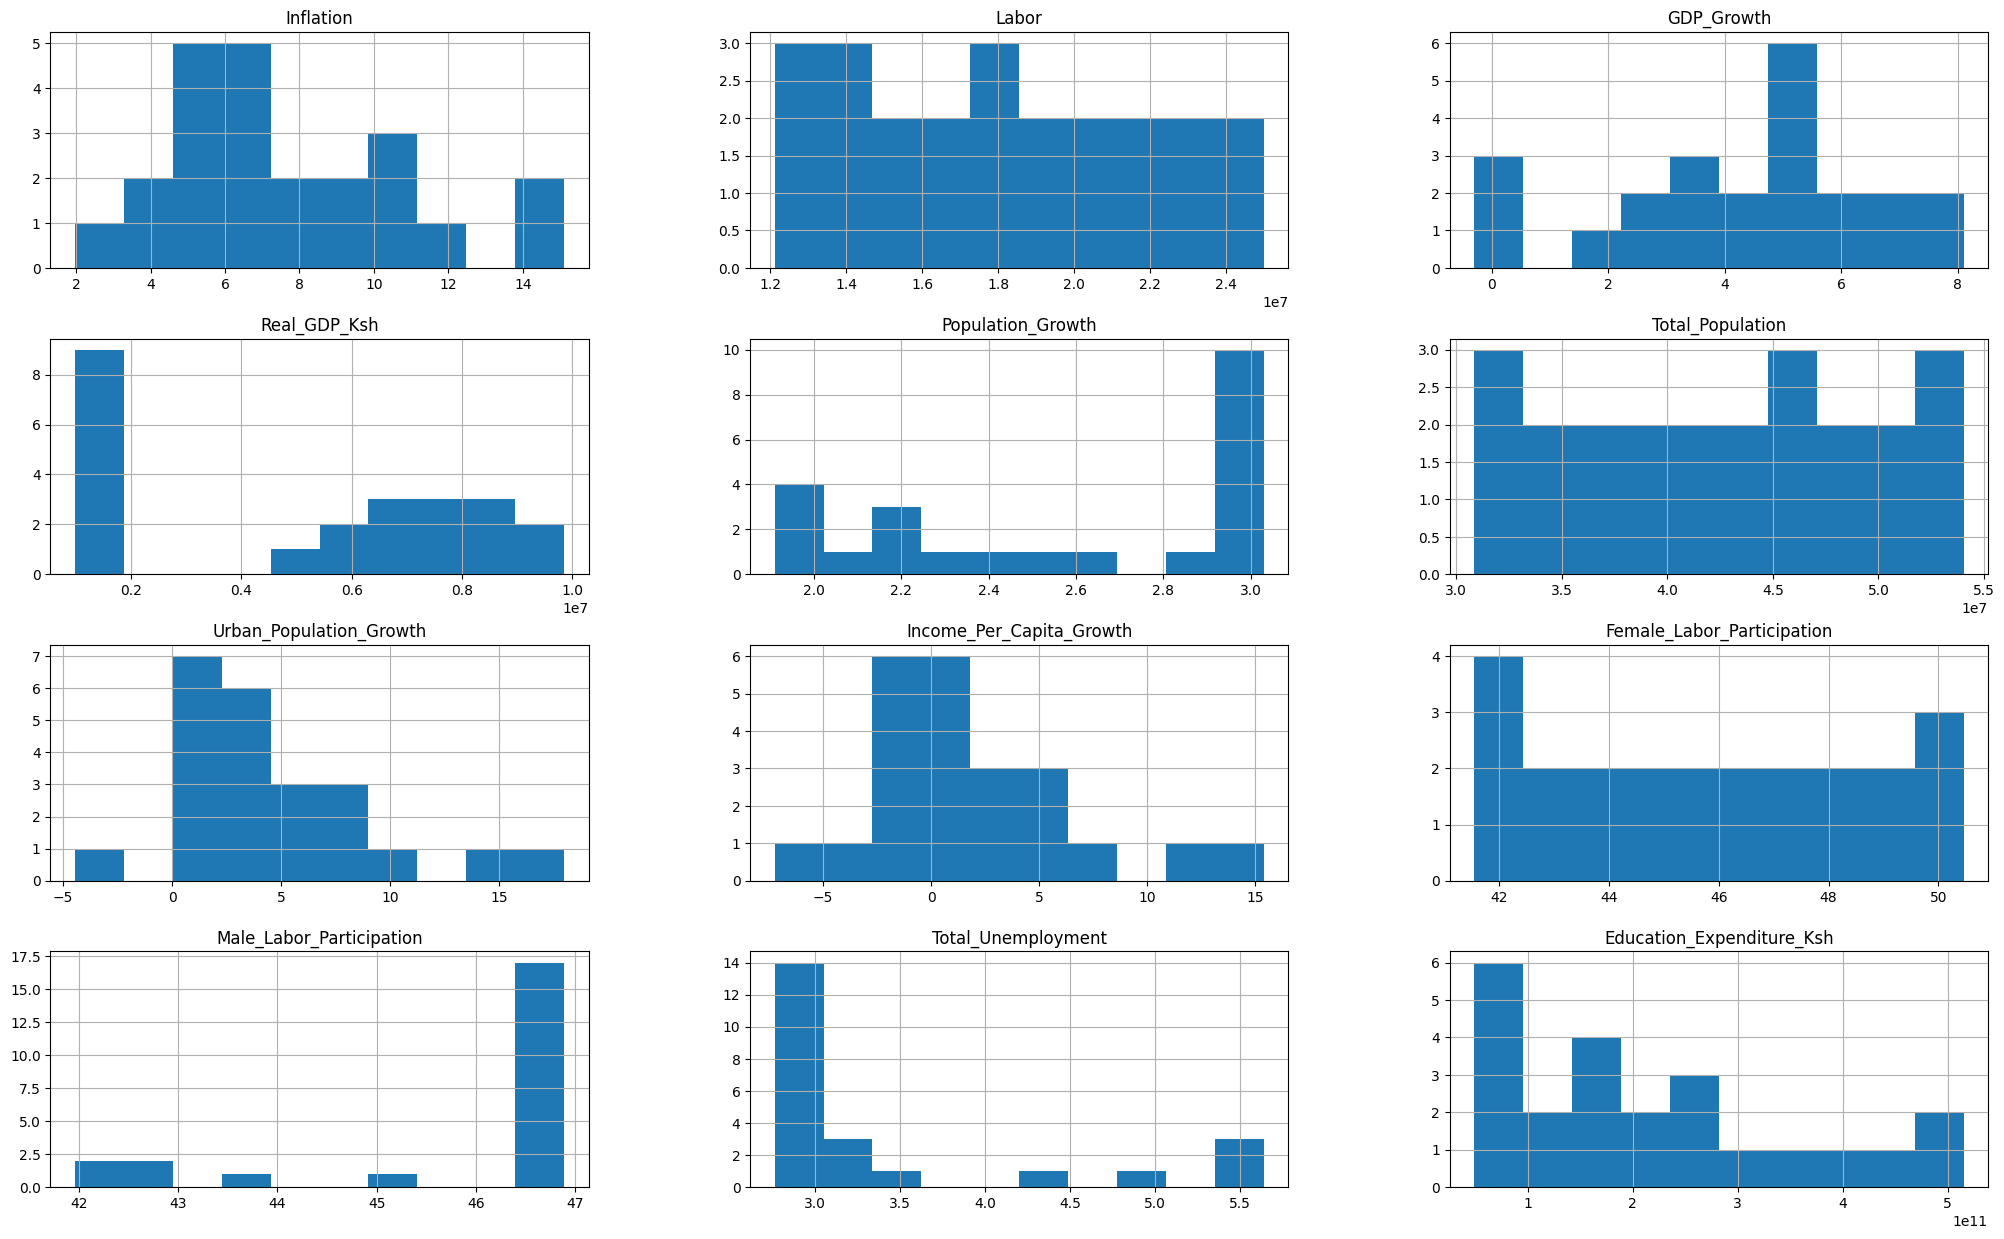

In [10]:
unemployment_df.hist(figsize=(25,15))


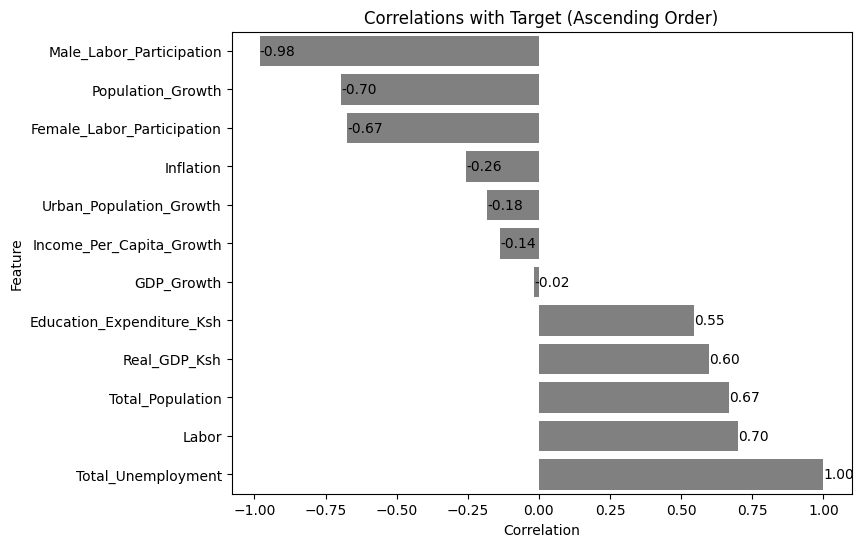

In [12]:
# Calculate the correlations between features and the target
correlations = unemployment_df.corr()['Total_Unemployment'].sort_values(ascending=True)

# Create a barplot to visualize correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations, y=correlations.index, orient='h',color="grey")
plt.title('Correlations with Target (Ascending Order)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate the correlation values on the bars
for i, corr in enumerate(correlations):
    plt.text(corr, i, f'{corr:.2f}', va='center', fontsize=10, color='black')
plt.grid(axis='x')




## Add more features from the given features

In [13]:
unemployment_df.head()

,Inflation,Labor,GDP_Growth,Real_GDP_Ksh,Population_Growth,Total_Population,Urban_Population_Growth,Income_Per_Capita_Growth,Female_Labor_Participation,Male_Labor_Participation,Total_Unemployment,Education_Expenditure_Ksh
Year,,,,,,,,,,,,
2000,9.98,12114213,0.0,982855,2.92,30851606,0.07,-2.81,50.46,46.89,3.13,4.914291e+10
2001,5.73,12601491,3.8,1020111,3.03,31800343,1.95,-1.09,50.03,46.87,3.07,5.154121e+10
2002,1.97,13103364,0.5,1025583,3.03,32779823,0.67,-2.34,49.61,46.84,3.09,5.949633e+10
2003,9.81,13606235,2.9,1055658,2.97,33767122,0.49,-2.44,49.18,46.82,3.04,7.552908e+10
2004,11.80,14125163,5.1,1109338,2.99,34791836,5.82,2.70,48.76,46.79,3.00,8.157499e+10


# Visualise the target variable and check for seasonality and trend if any


In [14]:
scaling=MinMaxScaler()
scaled=scaling.fit_transform(unemployment_df)
scaled_df= pd.DataFrame(scaled, columns=unemployment_df.columns)
scaled_df.index=unemployment_df.index

scaled_df.head()

,Inflation,Labor,GDP_Growth,Real_GDP_Ksh,Population_Growth,Total_Population,Urban_Population_Growth,Income_Per_Capita_Growth,Female_Labor_Participation,Male_Labor_Participation,Total_Unemployment,Education_Expenditure_Ksh
Year,,,,,,,,,,,,
2000,0.609589,0.000000,0.035714,0.000000,0.901786,0.000000,0.201606,0.195671,1.000000,1.000000,0.128472,0.000000
2001,0.286149,0.037859,0.488095,0.004201,1.000000,0.040936,0.285459,0.271643,0.951794,0.995943,0.107639,0.005148
2002,0.000000,0.076851,0.095238,0.004818,1.000000,0.083199,0.228368,0.216431,0.904709,0.989858,0.114583,0.022222
2003,0.596651,0.115922,0.380952,0.008209,0.946429,0.125800,0.220339,0.212014,0.856502,0.985801,0.097222,0.056633
2004,0.748097,0.156239,0.642857,0.014262,0.964286,0.170014,0.458073,0.439046,0.809417,0.979716,0.083333,0.069610


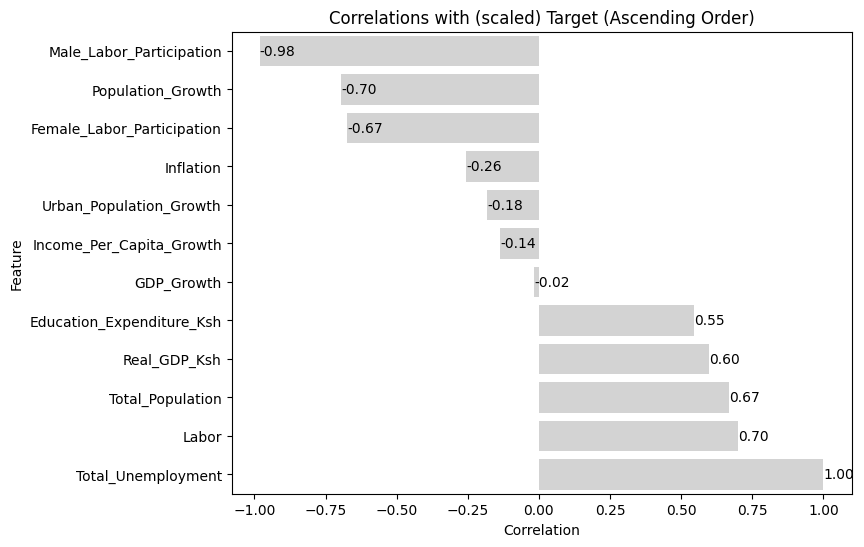

In [15]:

# Calculate the correlations between features and the target
correlations_new = scaled_df.corr()['Total_Unemployment'].sort_values(ascending=True)

# Create a barplot to visualize correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_new, y=correlations_new.index, orient='h',color="lightgrey")
plt.title('Correlations with (scaled) Target (Ascending Order)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate the correlation values on the bars
for i, corr in enumerate(correlations_new):
    plt.text(corr, i, f'{corr:.2f}', va='center', fontsize=10, color='black')
plt.grid(axis='x')



# calculate ratio of each field with another to compare against the unemployment rate with a condition given that the correlation with the unemployment rate is > 0.5

In [22]:
# Get columns without the last
cols_without_last = scaled_df.drop('Total_Unemployment',axis=1).columns

# Create unique pairs without the last column
unique_pairs = list(combinations(cols_without_last, 2))

# Calculate ratios and check correlation with the last column
ratios = pd.DataFrame()
for col1, col2 in unique_pairs:
    ratio_name = f'{col1}_{col2}_Ratio'
    ratio = scaled_df[col1] / scaled_df[col2]

    correlation_with_last = ratio.corr(scaled_df['Total_Unemployment'])

    if (correlation_with_last > 0.5) or (correlation_with_last < -0.5):
        ratios[ratio_name] = ratio



ratios = ratios[sorted(ratios.columns)]
#remove nan values by filling up with median
ratios.fillna(ratios.median(),inplace=True)
ratios.head()

,GDP_Growth_Female_Labor_Participation_Ratio,Labor_Total_Population_Ratio,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio
Year,,,
2000,0.035714,0.920229,1.030328
2001,0.512816,0.924819,1.050862
2002,0.105269,0.923703,1.055151
2003,0.444777,0.921479,1.039266
2004,0.794222,0.918978,1.043338


# Correlations for all the ratios

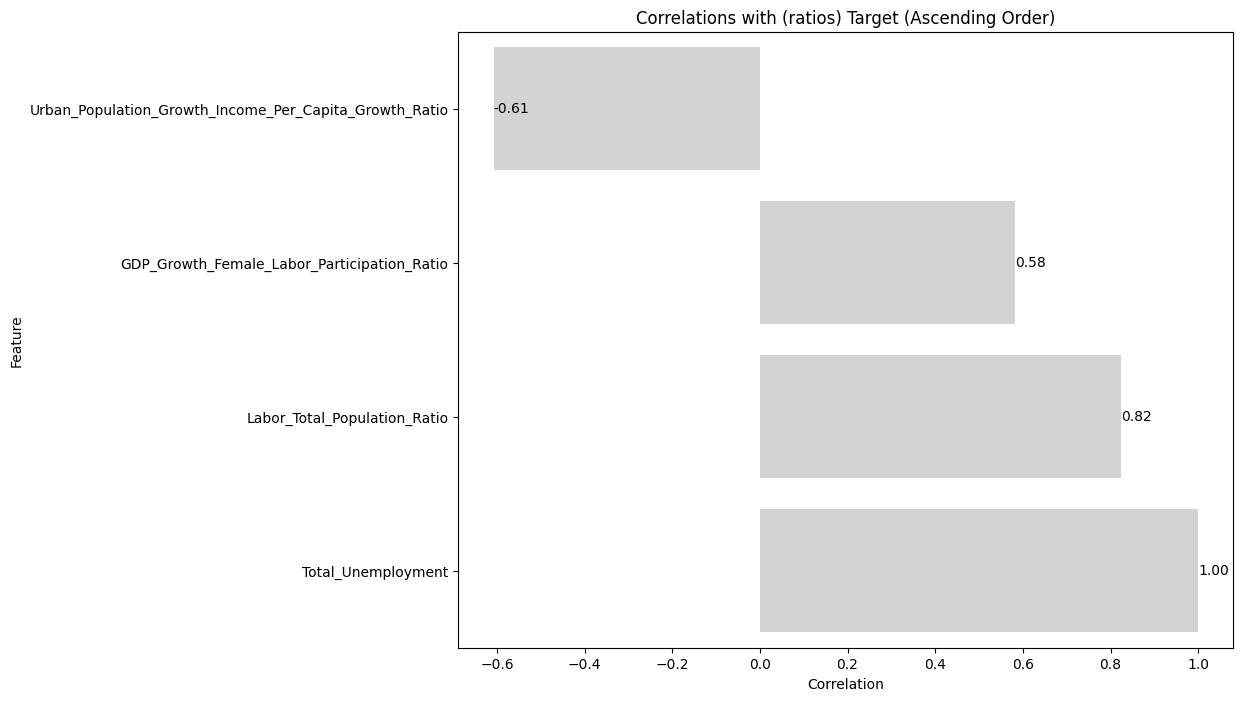

In [26]:
ratios["Total_Unemployment"]=scaled_df["Total_Unemployment"]

# Calculate the correlations between features and the target
correlations_ratios = ratios.corr()['Total_Unemployment'].sort_values(ascending=True)

# Create a barplot to visualize correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_ratios, y=correlations_ratios.index, orient='h',color="lightgrey")
plt.title('Correlations with (ratios) Target (Ascending Order)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate the correlation values on the bars
for i, corr in enumerate(correlations_ratios):
    plt.text(corr, i, f'{corr:.2f}', va='center', fontsize=10, color='black')
plt.grid(axis='x')

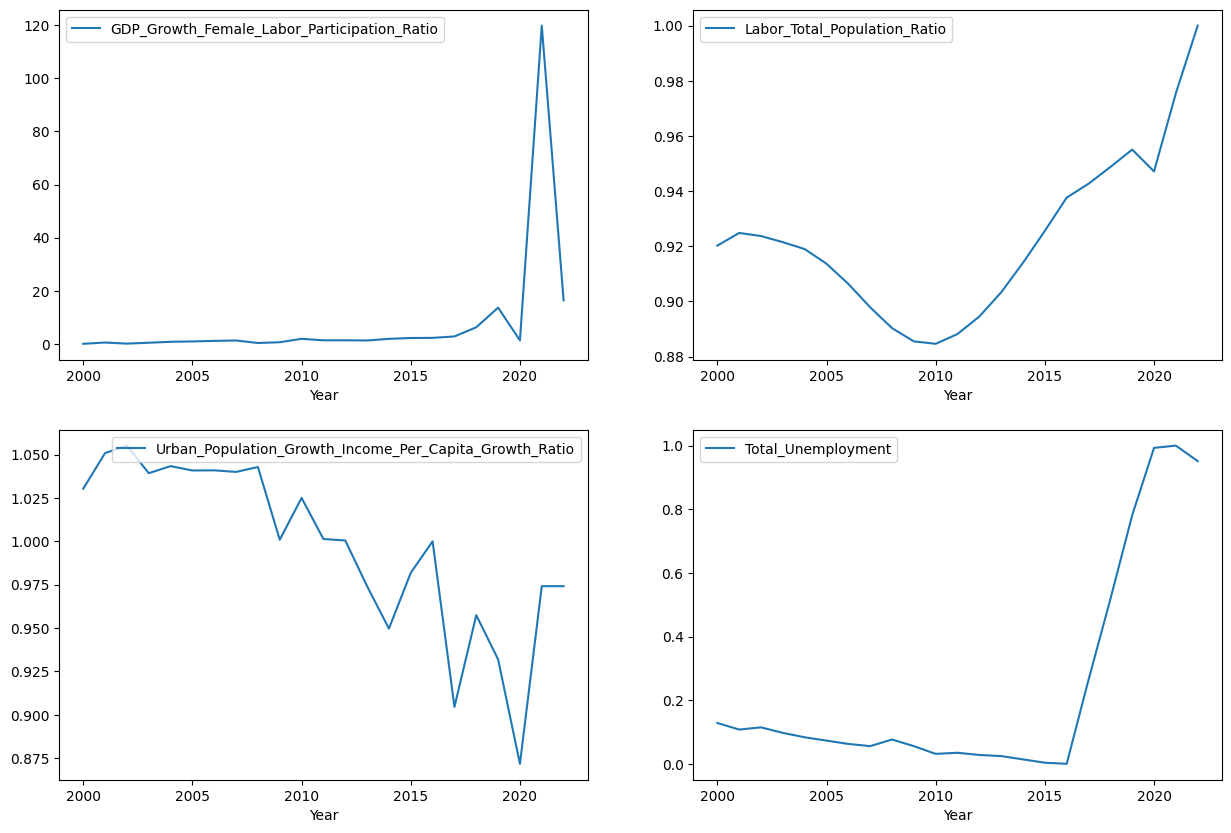

In [24]:

num_columns = len(ratios.columns)
num_plots_per_row = 2
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))

for i, column in enumerate(ratios.columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row

    sns.lineplot(data=ratios, x=ratios.index, y=column, label=column, ax=axes[row, col])
    axes[row, col].set_ylabel('')
    # Hide empty subplots
for i in range(num_columns, num_rows * num_plots_per_row):
    fig.delaxes(axes[i // num_plots_per_row, i % num_plots_per_row])



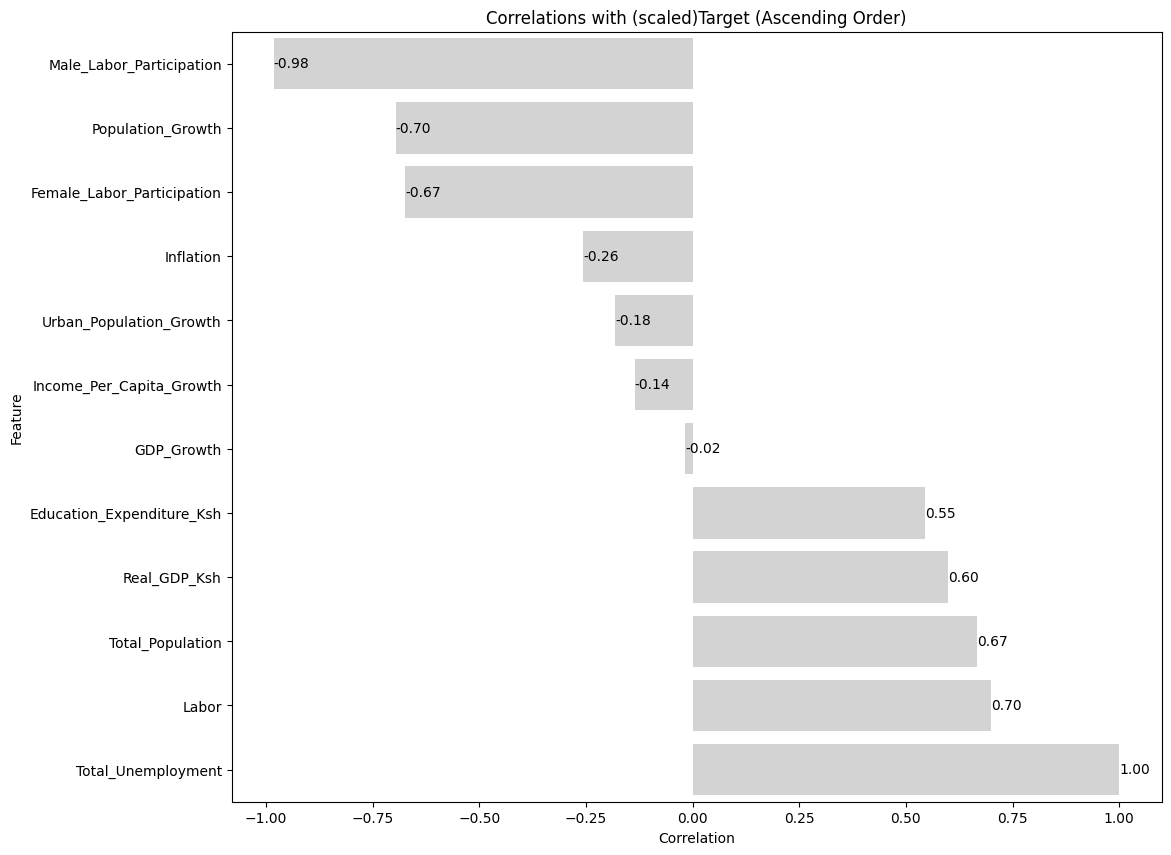

In [25]:
# Calculate the correlations between features and the target
correlations_scaled = scaled_df.corr()['Total_Unemployment'].sort_values(ascending=True)

# Create a barplot to visualize correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=correlations_scaled, y=correlations_scaled.index, orient='h',color="lightgrey")
plt.title('Correlations with (scaled)Target (Ascending Order)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate the correlation values on the bars
for i, corr in enumerate(correlations_scaled):
    plt.text(corr, i, f'{corr:.2f}', va='center', fontsize=10, color='black')
plt.grid(axis='x')

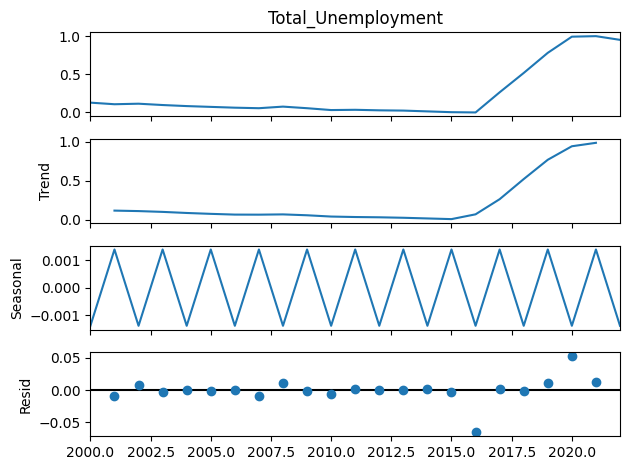

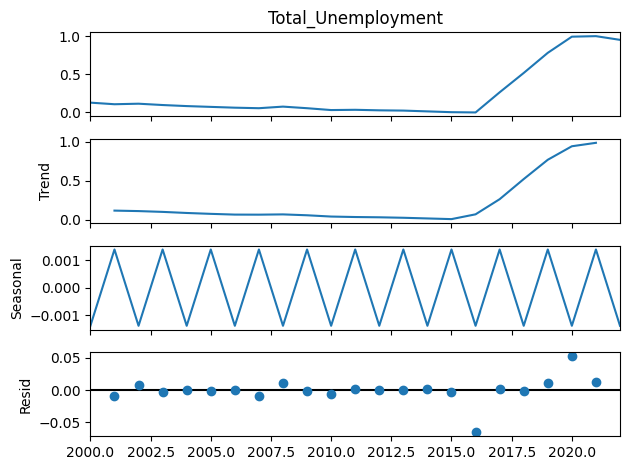

In [27]:
series = pd.Series(scaled_df['Total_Unemployment'])
results = seasonal_decompose(series, model='additive',period=2)
results.plot()

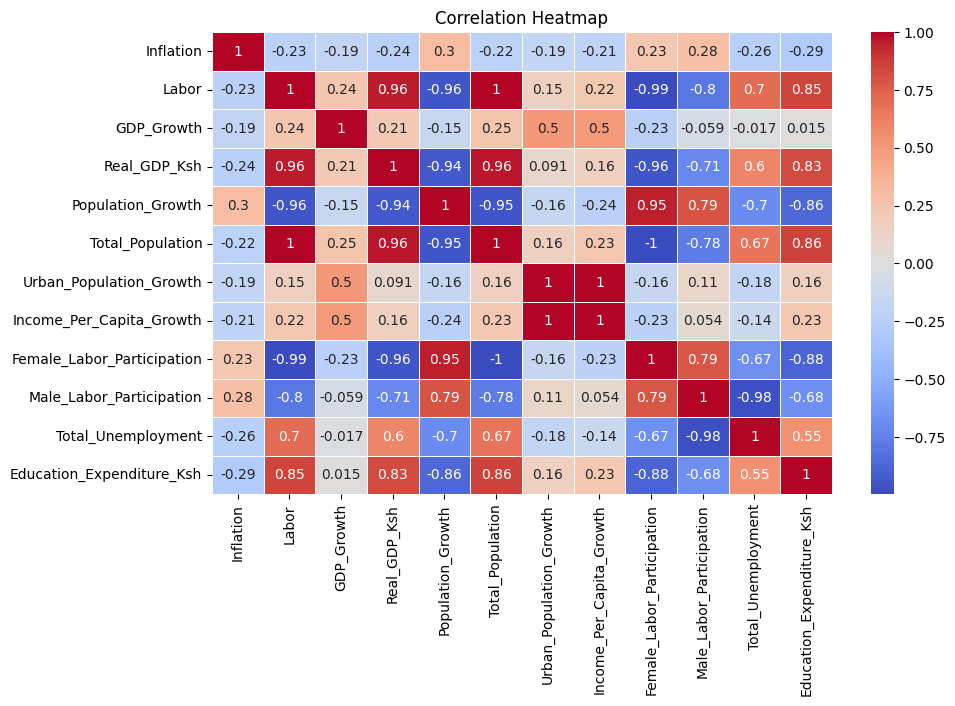

In [28]:
correlation_matrix = scaled_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create the final data set based on the following findings:
- urban population and per capita income are weakly anti correlated but their ratio is strongly anticorrelated with the target variable (unemployment rate)
- Male and female labor force participation are strongly anticorrelated
-  Labor to total population ratio is better than these two factors alone
- GDP growth w.r.t Female Labor participation is a strong correlation
- Real GDP  (inflation is already counted in it)
- Population Growth
- Education Expenditure correlated

In [53]:
ratios_final=ratios[['Urban_Population_Growth_Income_Per_Capita_Growth_Ratio','GDP_Growth_Female_Labor_Participation_Ratio','Labor_Total_Population_Ratio']]

In [55]:
unemployment_final=unemployment_df[['Real_GDP_Ksh','Population_Growth','Female_Labor_Participation','Male_Labor_Participation','Education_Expenditure_Ksh','Total_Unemployment']]
scaled_final=scaled_df[['Real_GDP_Ksh','Population_Growth','Female_Labor_Participation','Male_Labor_Participation','Education_Expenditure_Ksh','Total_Unemployment']]

## Create two datasets: 
- with the scaled data and ratios
- with the original data and ratios

In [63]:
ratios_scaled_final=pd.concat([scaled_final,ratios_final],axis=1)
ratios_original_final=pd.concat([unemployment_final,ratios_final],axis=1)
ratios_scaled_final.to_csv("Scaled_data_and_Ratios.csv")
ratios_original_final.to_csv("Original_data_and_Ratios.csv")



In [61]:
ratios_scaled_final.corr()

,Real_GDP_Ksh,Population_Growth,Female_Labor_Participation,Male_Labor_Participation,Education_Expenditure_Ksh,Total_Unemployment,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio,GDP_Growth_Female_Labor_Participation_Ratio,Labor_Total_Population_Ratio
Real_GDP_Ksh,1.000000,-0.938077,-0.956271,-0.708740,0.825043,0.597949,-0.829863,0.378203,0.537302
Population_Growth,-0.938077,1.000000,0.950202,0.793354,-0.864708,-0.695958,0.845177,-0.416571,-0.721325
Female_Labor_Participation,-0.956271,0.950202,1.000000,0.786193,-0.884954,-0.673330,0.848788,-0.407561,-0.579727
Male_Labor_Participation,-0.708740,0.793354,0.786193,1.000000,-0.678050,-0.981433,0.705676,-0.575543,-0.804742
Education_Expenditure_Ksh,0.825043,-0.864708,-0.884954,-0.678050,1.000000,0.545905,-0.903552,0.092341,0.469383
Total_Unemployment,0.597949,-0.695958,-0.673330,-0.981433,0.545905,1.000000,-0.607461,0.582619,0.823253
Urban_Population_Growth_Income_Per_Capita_Growth_Ratio,-0.829863,0.845177,0.848788,0.705676,-0.903552,-0.607461,1.000000,-0.166666,-0.480865
GDP_Growth_Female_Labor_Participation_Ratio,0.378203,-0.416571,-0.407561,-0.575543,0.092341,0.582619,-0.166666,1.000000,0.502345
Labor_Total_Population_Ratio,0.537302,-0.721325,-0.579727,-0.804742,0.469383,0.823253,-0.480865,0.502345,1.000000


In [60]:
ratios_original_final.corr()

,Real_GDP_Ksh,Population_Growth,Female_Labor_Participation,Male_Labor_Participation,Education_Expenditure_Ksh,Total_Unemployment,Urban_Population_Growth_Income_Per_Capita_Growth_Ratio,GDP_Growth_Female_Labor_Participation_Ratio,Labor_Total_Population_Ratio
Real_GDP_Ksh,1.000000,-0.938077,-0.956271,-0.708740,0.825043,0.597949,-0.829863,0.378203,0.537302
Population_Growth,-0.938077,1.000000,0.950202,0.793354,-0.864708,-0.695958,0.845177,-0.416571,-0.721325
Female_Labor_Participation,-0.956271,0.950202,1.000000,0.786193,-0.884954,-0.673330,0.848788,-0.407561,-0.579727
Male_Labor_Participation,-0.708740,0.793354,0.786193,1.000000,-0.678050,-0.981433,0.705676,-0.575543,-0.804742
Education_Expenditure_Ksh,0.825043,-0.864708,-0.884954,-0.678050,1.000000,0.545905,-0.903552,0.092341,0.469383
Total_Unemployment,0.597949,-0.695958,-0.673330,-0.981433,0.545905,1.000000,-0.607461,0.582619,0.823253
Urban_Population_Growth_Income_Per_Capita_Growth_Ratio,-0.829863,0.845177,0.848788,0.705676,-0.903552,-0.607461,1.000000,-0.166666,-0.480865
GDP_Growth_Female_Labor_Participation_Ratio,0.378203,-0.416571,-0.407561,-0.575543,0.092341,0.582619,-0.166666,1.000000,0.502345
Labor_Total_Population_Ratio,0.537302,-0.721325,-0.579727,-0.804742,0.469383,0.823253,-0.480865,0.502345,1.000000
